In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt                   
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN

In [228]:
# read data
df = pd.read_csv("mouse.csv", encoding='cp949', header=None)
df.columns = ['x','y']
df.head()

,x,y
0,0.542269,0.434343
1,0.421568,0.508084
2,0.432454,0.561386
3,0.565750,0.569858
4,0.488102,0.479678


In [230]:
df.describe()

,x,y
count,1100.000000,1100.000000
mean,0.499266,0.536068
std,0.133403,0.127321
min,0.043001,0.084809
25%,0.423268,0.446907
50%,0.496068,0.518729
75%,0.576643,0.597106
max,0.943163,0.971896


In [297]:
# scatter plotting 
def scatterPlot(df, labels):
    # get the number of labels
    unique_labels = set(labels)
    # Get the unique color of the label number. 
    colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
    # append outlier color black
    colors.append([0,0,0,1])
    
    # make color vector
    cvec = [colors[label] for label in labels] 
    
    plt.figure(figsize =(5, 5)) 
    plt.scatter(df['x'], df['y'], c = cvec)  
    plt.show() 
    return

In [298]:
# K means Clustering and scatter plot
# parameters: data, n_clusters, max_iteration
def doKmeans(X, clusters=2, max_iter = 50):
    # craete KMeans instance
    model = KMeans(n_clusters = clusters, max_iter = max_iter )
    # do clustering
    model.fit(X)
    # get clusters label 
    labels = model.predict(X)
    
    print(np.unique(labels))
    scatterPlot(X, labels)
    return

In [299]:
# DBSCAN and scatter plot
# parameters: data, epsilon, min_samples
def doDBSCAN(X, eps, min_samples):
    # create DBSCAN instance
    model = DBSCAN(eps= eps, min_samples=min_samples)
    # do clustering
    model.fit(X)
    # get clusters label
    labels = model.labels_
    print(np.unique(labels))
    
    scatterPlot(X, labels)
    return labels

n_cluster: 2
[0 1]


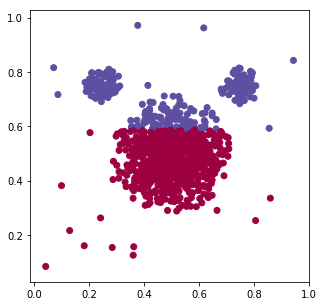

n_cluster: 3
[0 1 2]


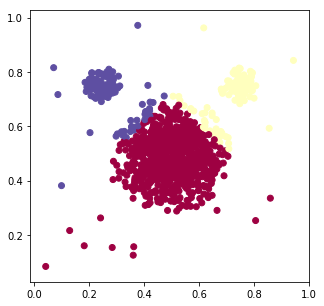

n_cluster: 4
[0 1 2 3]


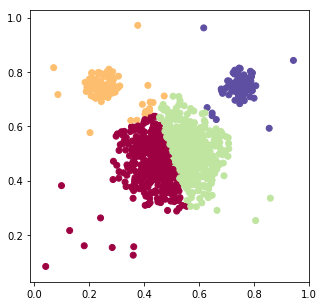

n_cluster: 5
[0 1 2 3 4]


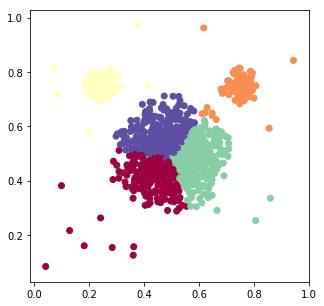

n_cluster: 6
[0 1 2 3 4 5]


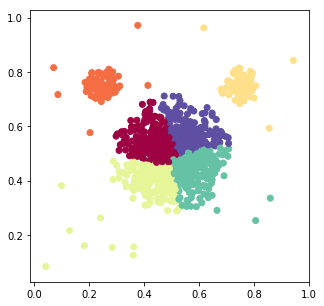

n_cluster: 7
[0 1 2 3 4 5 6]


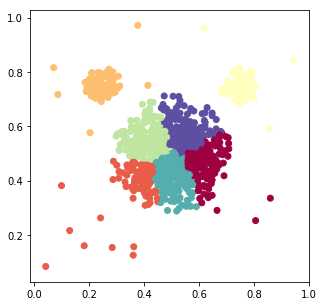

n_cluster: 8
[0 1 2 3 4 5 6 7]


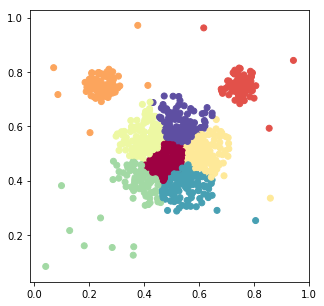

In [302]:
# do K means cluster
for n_cluster in [2,3,4,5,6,7,8]:
    print('n_cluster:' , n_cluster)
    kmeans_labels = doKmeans(df, n_cluster, 200)

eplison: 0.02
min_sample: 10
[-1  0  1  2  3  4  5  6]


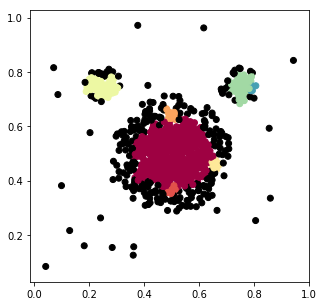

eplison: 0.02
min_sample: 50
[-1]


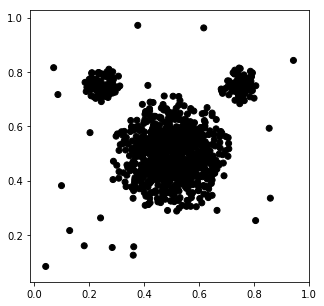

eplison: 0.02
min_sample: 100
[-1]


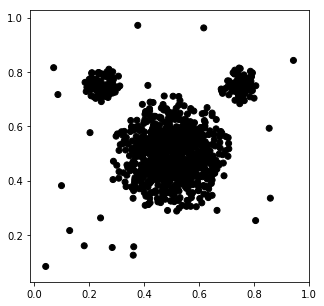

eplison: 0.04
min_sample: 10
[-1  0  1  2]


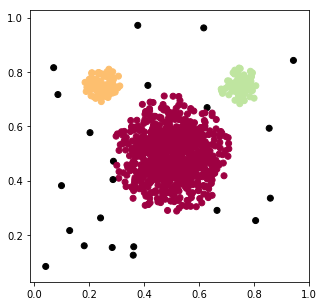

eplison: 0.04
min_sample: 50
[-1  0  1  2]


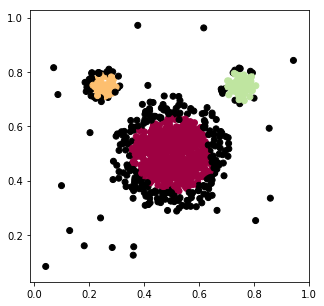

eplison: 0.04
min_sample: 100
[-1]


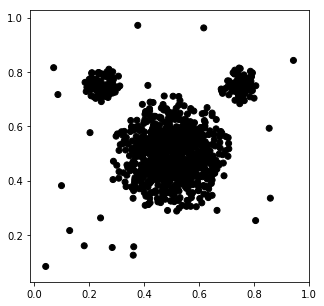

eplison: 0.06
min_sample: 10
[-1  0  1  2]


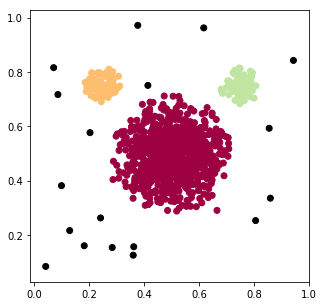

eplison: 0.06
min_sample: 50
[-1  0  1  2]


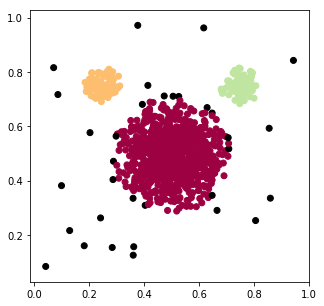

eplison: 0.06
min_sample: 100
[-1  0]


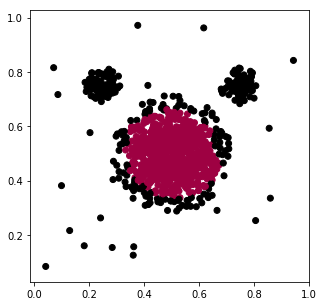

eplison: 0.1
min_sample: 10
[-1  0  1]


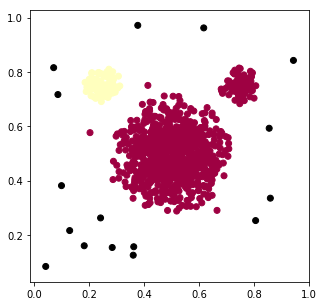

eplison: 0.1
min_sample: 50
[-1  0  1]


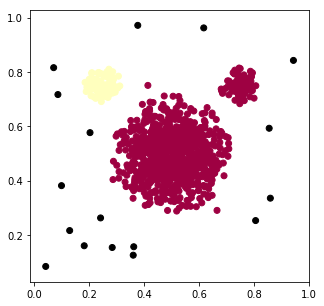

eplison: 0.1
min_sample: 100
[-1  0]


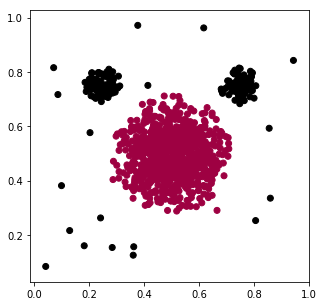

In [301]:
# do DBSCAN
for eplison in [0.02, 0.04,  0.06, 0.1]:
    for min_sample in [10,50,100]:
        print('eplison:' , eplison)
        print('min_sample:' , min_sample)
        dbscan_labels = doDBSCAN(df, eplison, min_sample)